In [23]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Diccionario de zonas horarias
timezone_dict = {
    'ar': 'Asia/Riyadh',
    'de': 'Europe/Berlin',
    'hu': 'Europe/Budapest',
    'zh': 'Asia/Shanghai',
    'es': 'Europe/Madrid',
    'fr': 'Europe/Paris',
    'vi': 'Asia/Ho_Chi_Minh',
    'ru': 'Europe/Moscow',
    'ja': 'Asia/Tokyo',
    'it': 'Europe/Rome',
    'pt': 'America/Sao_Paulop'
}

# Diccionario de traducción
translation_dict = {
    'arte': 'art',
    'deporte': 'sports',
    'derecho': 'rights',
    'eventos': 'events',
    'filosofia': 'philosophy',
    'geografia': 'geography',
    'historia': 'history',
    'juegos': 'games',
    'matematica': 'mathematics',
    'naturaleza': 'nature',
    'politica': 'politics',
    'salud': 'health',
    'desportos': 'sports',
    'direito': 'rights',
    'jogos': 'games',
    'natureza': 'nature',
    'religiao': 'religion',
    'saude': 'health'
}

directory = 'converted'  # Asegúrate de que el directorio es correcto
language_activities = {}  # Diccionario para guardar las actividades de cada idioma
language_dates = {}  # Diccionario para guardar las fechas inicial y final de cada idioma

# Loop a través de cada archivo en el directorio
for file in os.listdir(directory):
    if file.startswith('df_'):
        language = file.split('_')[1].split('.')[0]  # Extrae el idioma del nombre del archivo
        print('Reading File:', file)
        
        # Cargar el dataframe
        path = os.path.join(directory, file)
        df = pd.read_pickle(path)

         # Convertir 'datetime' a objetos datetime
        if language == 'pt':
            df['datetime'] = pd.to_datetime(df['timestamp'], format='%Y-%m-%dT%H:%M:%SZ', utc=True)
        else:
            df['datetime'] = pd.to_datetime(df['timestamp'], unit='s', utc=True)
        
        # Convertir la hora a la zona horaria del idioma
        df['datetime'] = df['datetime'].dt.tz_convert(timezone_dict[language])

        # Convertir 'datetime' a objetos datetime
        df['datetime'] = pd.to_datetime(df['datetime'])
        df['day_of_week'] = df['datetime'].dt.dayofweek
        df['hour'] = df['datetime'].dt.hour

        # Explode en la columna 'categories' para separar las categorías
        df = df.explode('categories')

        # Traducir las categorías usando el diccionario de traducción
        df['categories'] = df['categories'].map(translation_dict).fillna(df['categories'])

        # Obtener la fecha mínima y máxima
        min_date = df['datetime'].min()
        max_date = df['datetime'].max()
        language_dates[language] = {'start_date': min_date, 'end_date': max_date}

        # Agrupar por categoría, día de la semana y hora, y contar las ediciones
        category_activity = df.groupby(['categories', 'day_of_week', 'hour']).size().unstack(level=0, fill_value=0)

        # Almacenar la actividad por categoría en el diccionario
        if language not in language_activities:
            language_activities[language] = {}
        for category in category_activity.columns:
            if category not in language_activities[language]:
                language_activities[language][category] = category_activity[category]

# Imprimir las fechas inicial y final de cada idioma
for language, dates in language_dates.items():
    print(f"Language: {language}, Start Date: {dates['start_date']}, End Date: {dates['end_date']}")

Reading File: df_ar
Reading File: df_de
Reading File: df_hu
Reading File: df_zh
Reading File: df_pt
Reading File: df_es
Reading File: df_fr
Reading File: df_vi
Reading File: df_ru
Reading File: df_ja
Reading File: df_it
Language: ar, Start Date: 2003-07-11 03:23:02+03:00, End Date: 2010-03-28 02:57:37+03:00
Language: de, Start Date: 2001-04-02 20:27:41+02:00, End Date: 2010-03-28 00:59:41+01:00
Language: hu, Start Date: 2003-07-09 06:41:24+02:00, End Date: 2010-11-07 05:03:38+01:00
Language: zh, Start Date: 2002-10-31 01:19:19+08:00, End Date: 2010-03-28 07:58:03+08:00
Language: pt, Start Date: 2001-06-17 14:13:19-03:00, End Date: 2011-10-25 02:51:22-02:00
Language: es, Start Date: 2001-05-25 11:53:55+02:00, End Date: 2010-10-23 16:25:54+02:00
Language: fr, Start Date: 2001-08-04 11:49:16+02:00, End Date: 2010-03-28 00:59:35+01:00
Language: vi, Start Date: 2002-11-16 21:54:24+07:00, End Date: 2010-03-28 06:56:21+07:00
Language: ru, Start Date: 2002-11-13 21:48:05+03:00, End Date: 2010-

In [3]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Diccionario de zonas horarias
timezone_dict = {
    'ar': 'Asia/Riyadh',
    'de': 'Europe/Berlin',
    'hu': 'Europe/Budapest',
    'zh': 'Asia/Shanghai',
    'es': 'Europe/Madrid',
    'fr': 'Europe/Paris',
    'vi': 'Asia/Ho_Chi_Minh',
    'ru': 'Europe/Moscow',
    'ja': 'Asia/Tokyo',
    'it': 'Europe/Rome',
    'pt': 'America/Sao_Paulo'
}

# Diccionario de traducción
translation_dict = {
    'arte': 'art',
    'deporte': 'sports',
    'derecho': 'rights',
    'eventos': 'events',
    'filosofia': 'philosophy',
    'geografia': 'geography',
    'historia': 'history',
    'juegos': 'games',
    'matematica': 'mathematics',
    'naturaleza': 'nature',
    'politica': 'politics',
    'salud': 'health',
    'desportos': 'sports',
    'direito': 'rights',
    'jogos': 'games',
    'natureza': 'nature',
    'religiao': 'religion',
    'saude': 'health'
}

directory = 'converted'  # Asegúrate de que el directorio es correcto
language_activities = {}  # Diccionario para guardar las actividades de cada idioma

# Loop a través de cada archivo en el directorio
for file in os.listdir(directory):
    if file.startswith('df_'):
        language = file.split('_')[1].split('.')[0]  # Extrae el idioma del nombre del archivo
        print('Reading File:', file)
        
        # Cargar el dataframe
        path = os.path.join(directory, file)
        df = pd.read_pickle(path)

         # Convertir 'datetime' a objetos datetime
        if language == 'pt':
            df['datetime'] = pd.to_datetime(df['timestamp'], format='%Y-%m-%dT%H:%M:%SZ', utc=True)
        else:
            df['datetime'] = pd.to_datetime(df['timestamp'], unit='s', utc=True)
        
        # Convertir la hora a la zona horaria del idioma
        df['datetime'] = df['datetime'].dt.tz_convert(timezone_dict[language])

        # Convertir 'datetime' a objetos datetime
        df['datetime'] = pd.to_datetime(df['datetime'])
        df['day_of_week'] = df['datetime'].dt.dayofweek
        df['hour'] = df['datetime'].dt.hour

        # Explode en la columna 'categories' para separar las categorías
        df = df.explode('categories')

        # Traducir las categorías usando el diccionario de traducción
        df['categories'] = df['categories'].map(translation_dict).fillna(df['categories'])

        # Agrupar por categoría, día de la semana y hora, y contar las ediciones
        category_activity = df.groupby(['categories', 'day_of_week', 'hour']).size().unstack(level=0, fill_value=0)

        # Asegurarse de que todas las horas están representadas en cada categoría
        # all_hours = np.arange(24)  # Crea un array de horas de 0 a 23
        # for category in category_activity.columns:
        #     category_activity[category] = category_activity[category].reindex(all_hours, fill_value=0)

        # Almacenar la actividad por categoría en el diccionario
        if language not in language_activities:
            language_activities[language] = {}
        for category in category_activity.columns:
            if category not in language_activities[language]:
                language_activities[language][category] = category_activity[category]




Reading File: df_ar
Reading File: df_de
Reading File: df_hu
Reading File: df_zh
Reading File: df_pt
Reading File: df_es
Reading File: df_fr
Reading File: df_vi
Reading File: df_ru
Reading File: df_ja
Reading File: df_it


In [ ]:
language_editions=language_editors

In [2]:
import pickle
with open('language_editions.pkl', 'rb') as x:
    language_editors = pickle.load(x)

print("El diccionario language_activities ha sido cargado correctamente.")


El diccionario language_activities ha sido cargado correctamente.


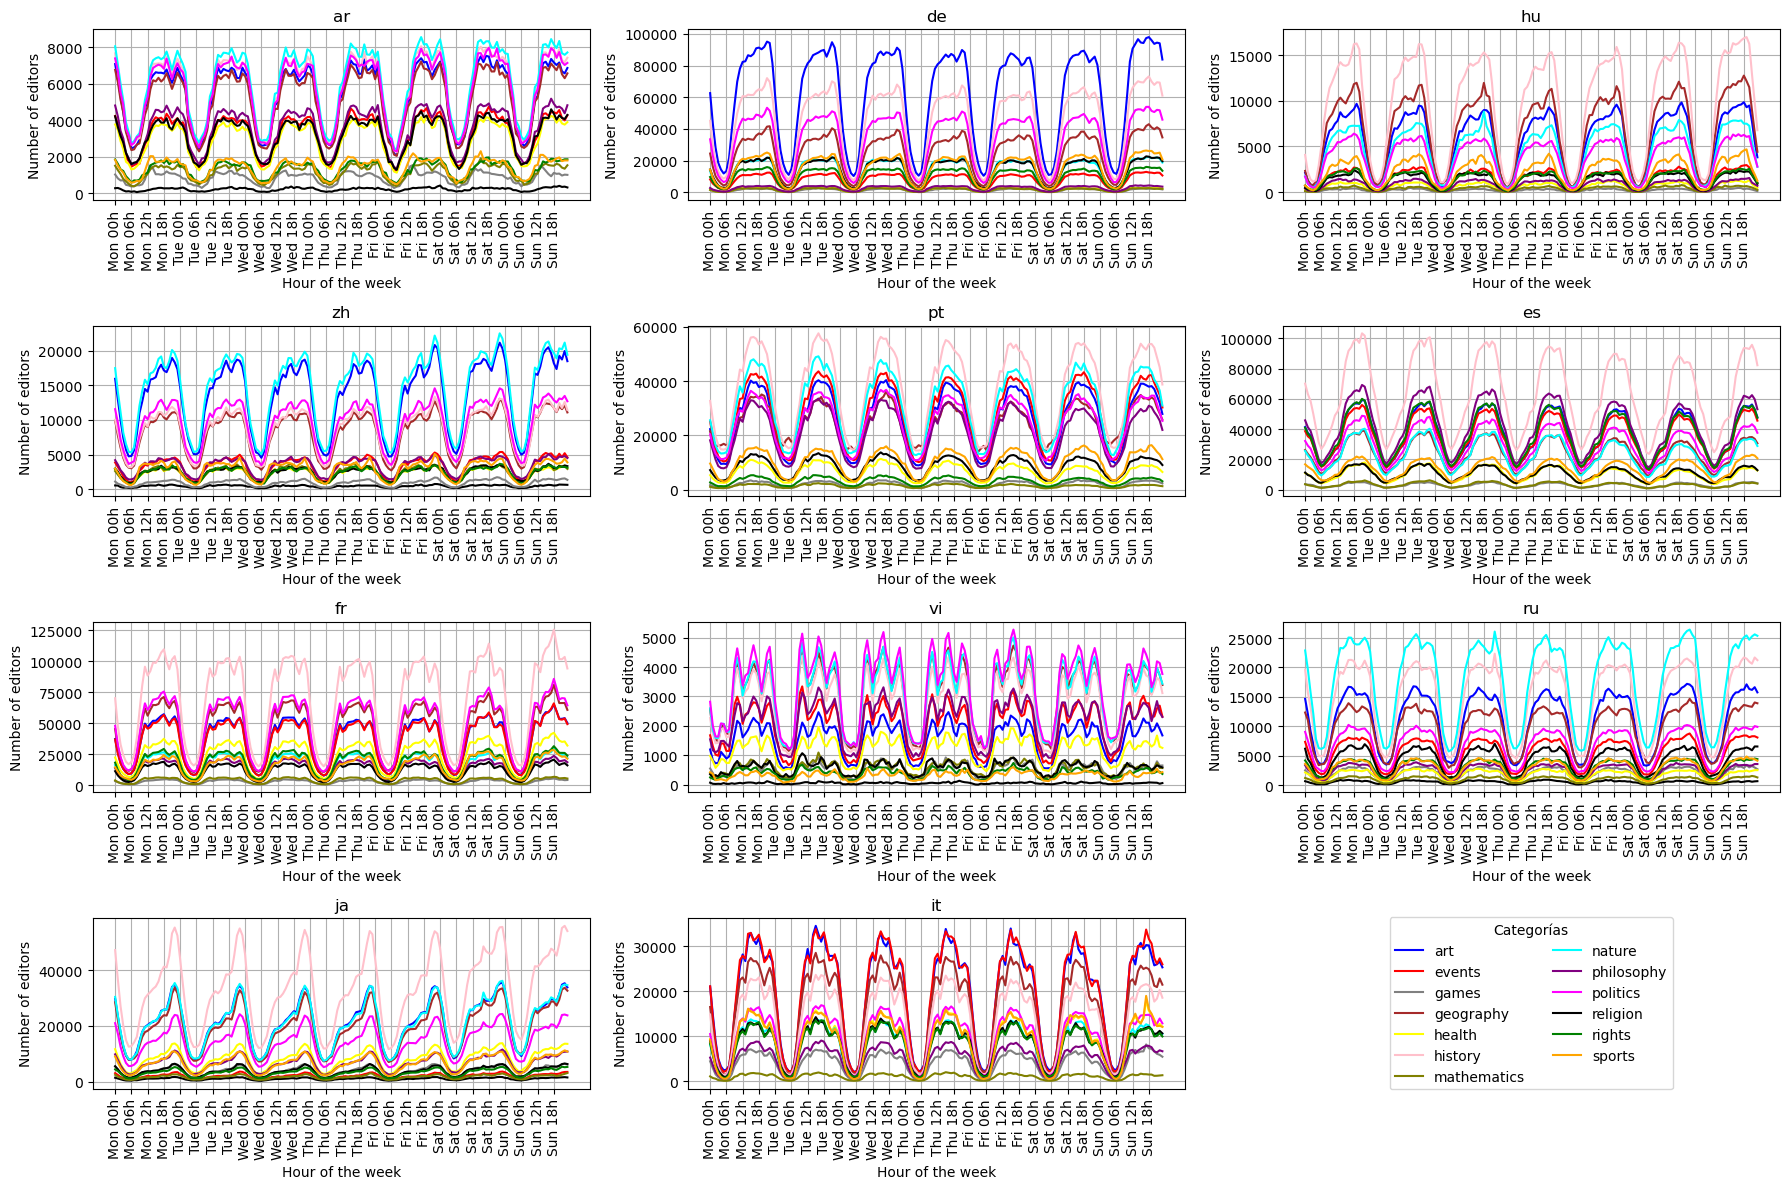

In [3]:
# Diccionario de zonas horarias
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
timezone_dict = {
    'ar': 'Asia/Riyadh',
    'de': 'Europe/Berlin',
    'hu': 'Europe/Budapest',
    'zh': 'Asia/Shanghai',
    'es': 'Europe/Madrid',
    'fr': 'Europe/Paris',
    'vi': 'Asia/Ho_Chi_Minh',
    'ru': 'Europe/Moscow',
    'ja': 'Asia/Tokyo',
    'it': 'Europe/Rome',
    'pt': 'America/Sao_Paulo'
}

# Diccionario de traducción
translation_dict = {
    'arte': 'art',
    'deporte': 'sports',
    'derecho': 'rights',
    'eventos': 'events',
    'filosofia': 'philosophy',
    'geografia': 'geography',
    'historia': 'history',
    'juegos': 'games',
    'matematica': 'mathematics',
    'naturaleza': 'nature',
    'politica': 'politics',
    'salud': 'health',
    'desportos': 'sports',
    'direito': 'rights',
    'jogos': 'games',
    'natureza': 'nature',
    'religiao': 'religion',
    'saude': 'health'
}

# Diccionario de colores para cada categoría
color_dict = {
    'art': 'blue',
    'sports': 'orange',
    'rights': 'green',
    'events': 'red',
    'philosophy': 'purple',
    'geography': 'brown',
    'history': 'pink',
    'games': 'gray',
    'mathematics': 'olive',
    'nature': 'cyan',
    'politics': 'magenta',
    'health': 'yellow',
    'religion': 'black'
}
# Crear una figura con subplots de 4x3
fig, axes = plt.subplots(4, 3, figsize=(18, 12))

# Iterar sobre los idiomas y crear los gráficos
for i, (language, categories) in enumerate(language_editors.items()):
    ax = axes.flat[i]
    for category, activity in categories.items():
        hours_extended = np.tile(np.arange(24), 7) + np.repeat(np.arange(7) * 24, 24)
        edits = activity.values.flatten()
        ax.plot(hours_extended, edits, linestyle='-', color=color_dict.get(category, 'black'), label=category)
    ax.set_title(f'{language}')
    ax.set_xlabel('Hour of the week')
    ax.set_ylabel('Number of editors')
    ax.grid(True)
    ax.set_xticks(np.arange(0, 7*24, 6))
    ax.set_xticklabels([f'{d} {h:02d}h' for d in ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'] for h in range(0, 24, 6)], rotation=90)

# Ocultar el último subplot (11 idiomas = 12 subplots, uno estará vacío)
axes.flat[-1].axis('off')

# Agregar la leyenda en el subplot vacío
handles, labels = ax.get_legend_handles_labels()
axes.flat[-1].legend(handles, labels, loc='center', title='Categorías', ncol=2)

# Ajustar el diseño
plt.tight_layout()
plt.show()

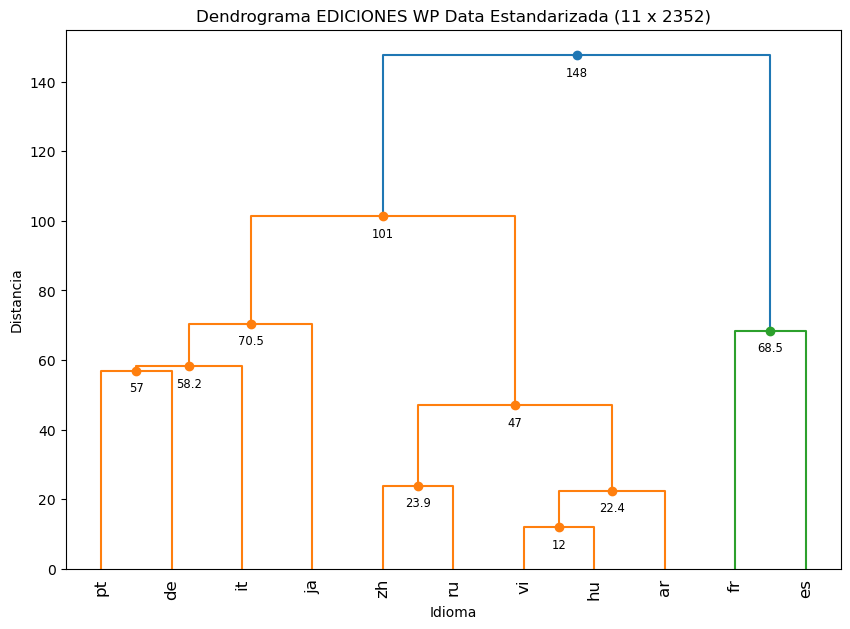

In [6]:
import pandas as pd
import numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Diccionario de números para cada categoría
category_dict = {
    'art': 1,
    'events': 2,
    'foods': 3,
    'games': 4,
    'geography': 5,
    'health': 6,
    'history': 7,
    'mathematics': 8,
    'nature': 9,
    'philosophy': 10,
    'politics': 11,
    'religion': 12,
    'rights': 13,
    'sports': 14
}


data_list = []
for language, categories_data in language_editors.items():
    for category, activity in categories_data.items():
        category_number = category_dict[category]
        for (day_of_week, hour), edits in activity.items():
            # Crear una columna que represente la hora de la semana
            week_hour = day_of_week * 24 + hour
            data_list.append([language, category_number, week_hour, edits])

data = pd.DataFrame(data_list, columns=['language', 'category', 'week_hour', 'editors'])

# Pivotar el DataFrame para que cada hora de la semana sea una columna y cada fila sea una combinación de idioma y categoría
data_pivot = data.pivot_table(index=['language'], columns=['week_hour', 'category'], values='editors', fill_value=0)

# Normalizar los datos utilizando z-score
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_pivot)
#data_scaled = data_pivot

# Realizar la clusterización jerárquica
linked = linkage(data_scaled, method='ward')

# Crear etiquetas para cada fila basadas en el idioma
labels = data_pivot.index.tolist()

# Generar el dendrograma y capturar la salida para acceder a las coordenadas de los enlaces
plt.figure(figsize=(10, 7))
dendro = dendrogram(linked,
                    labels=labels,
                    distance_sort='descending',
                    show_leaf_counts=True)

# Añadir anotaciones de distancia
for i, d, c in zip(dendro['icoord'], dendro['dcoord'], dendro['color_list']):
    x = 0.5 * sum(i[1:3])
    y = d[1]
    if y > 0:  # Solo añadir etiquetas por encima de la línea cero para claridad
        plt.plot(x, y, 'o', c=c)
        plt.annotate(f"{y:.3g}", (x, y), xytext=(0, -8),
                     textcoords='offset points', va='top', ha='center', fontsize='small')
plt.title('Dendrograma EDICIONES WP Data Estandarizada (11 x 2352)')
plt.xlabel('Idioma')
plt.ylabel('Distancia')
plt.xticks(rotation=90)
plt.savefig('ediciones/dendrogram2.png')
plt.show()


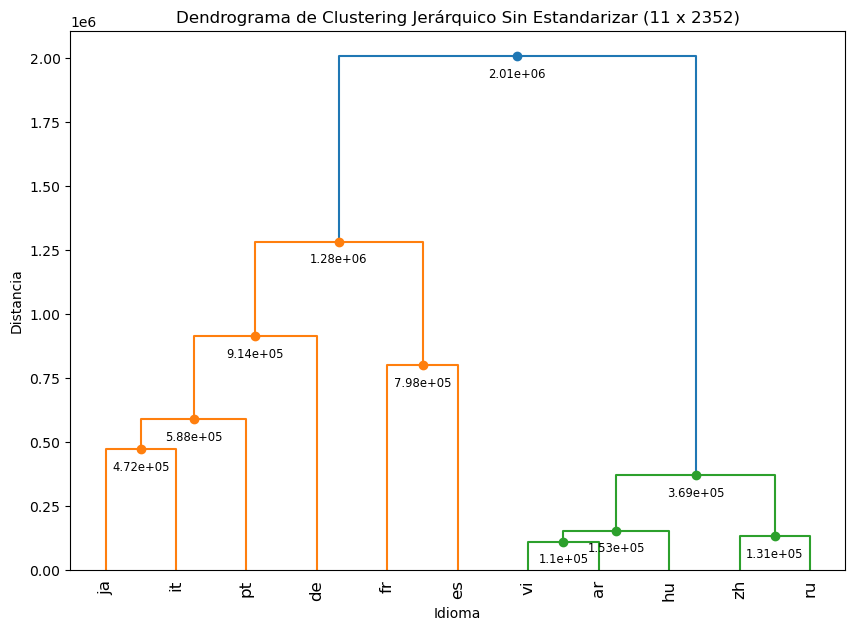

In [23]:
import pandas as pd
import numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


# Normalizar los datos utilizando z-score
scaler = StandardScaler()
data_scaled = data_pivot

# Realizar la clusterización jerárquica
linked = linkage(data_scaled, method='ward')

# Crear etiquetas para cada fila basadas en el idioma
labels = data_pivot.index.tolist()

# Generar el dendrograma y capturar la salida para acceder a las coordenadas de los enlaces
plt.figure(figsize=(10, 7))
dendro = dendrogram(linked,
                    labels=labels,
                    distance_sort='descending',
                    show_leaf_counts=True)

# Añadir anotaciones de distancia
for i, d, c in zip(dendro['icoord'], dendro['dcoord'], dendro['color_list']):
    x = 0.5 * sum(i[1:3])
    y = d[1]
    if y > 0:  # Solo añadir etiquetas por encima de la línea cero para claridad
        plt.plot(x, y, 'o', c=c)
        plt.annotate(f"{y:.3g}", (x, y), xytext=(0, -8),
                     textcoords='offset points', va='top', ha='center', fontsize='small')
plt.title('Dendrograma de Clustering Jerárquico Sin Estandarizar (11 x 2352)')
plt.xlabel('Idioma')
plt.ylabel('Distancia')
plt.xticks(rotation=90)
plt.savefig('ediciones/dendrogram1.png')
plt.show()


In [23]:
data_list = []
for language, categories_data in language_editors.items():
    for category, activity in categories_data.items():
        category_number = category_dict[category]
        for (day_of_week, hour), edits in activity.items():
            hour_of_day = hour  # Mantener solo la hora del día
            data_list.append([language, category_number, hour_of_day, edits])

data = pd.DataFrame(data_list, columns=['language', 'category', 'hour_of_day', 'edits'])

# Pivotar el DataFrame para que cada hora del día sea una columna y cada fila sea una combinación de idioma y categoría
data_pivot = data.pivot_table(index=['language'], columns=['hour_of_day', 'category'], values='edits', fill_value=0)

# Opcional: normalizar los datos utilizando z-score
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_pivot)
data_scaled = pd.DataFrame(data_scaled, index=data_pivot.index, columns=data_pivot.columns)

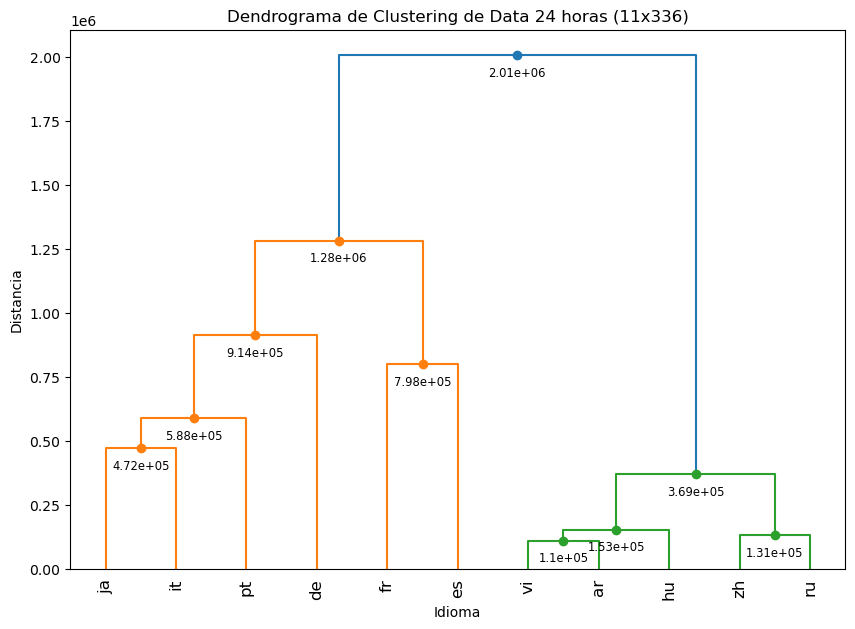

In [24]:
import pandas as pd
import numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Diccionario de números para cada categoría
category_dict = {
    'art': 1,
    'events': 2,
    'foods': 3,
    'games': 4,
    'geography': 5,
    'health': 6,
    'history': 7,
    'mathematics': 8,
    'nature': 9,
    'philosophy': 10,
    'politics': 11,
    'religion': 12,
    'rights': 13,
    'sports': 14
}


data_list = []
for language, categories_data in language_editors.items():
    for category, activity in categories_data.items():
        category_number = category_dict[category]
        for (day_of_week, hour), edits in activity.items():
            # Crear una columna que represente la hora de la semana
            week_hour = day_of_week * 24 + hour
            data_list.append([language, category_number, week_hour, edits])

data = pd.DataFrame(data_list, columns=['language', 'category', 'week_hour', 'edits'])

# Pivotar el DataFrame para que cada hora de la semana sea una columna y cada fila sea una combinación de idioma y categoría
data_pivot = data.pivot_table(index=['language'], columns=['week_hour', 'category'], values='edits', fill_value=0)

# Normalizar los datos utilizando z-score
scaler = StandardScaler()
data_scaled = data_pivot

# Realizar la clusterización jerárquica
linked = linkage(data_scaled, method='ward')

# Crear etiquetas para cada fila basadas en el idioma
labels = data_pivot.index.tolist()

# Generar el dendrograma y capturar la salida para acceder a las coordenadas de los enlaces
plt.figure(figsize=(10, 7))
dendro = dendrogram(linked,
                    labels=labels,
                    distance_sort='descending',
                    show_leaf_counts=True)

# Añadir anotaciones de distancia
for i, d, c in zip(dendro['icoord'], dendro['dcoord'], dendro['color_list']):
    x = 0.5 * sum(i[1:3])
    y = d[1]
    if y > 0:  # Solo añadir etiquetas por encima de la línea cero para claridad
        plt.plot(x, y, 'o', c=c)
        plt.annotate(f"{y:.3g}", (x, y), xytext=(0, -8),
                     textcoords='offset points', va='top', ha='center', fontsize='small')
plt.title('Dendrograma de Clustering de Data 24 horas (11x336)')
plt.xlabel('Idioma')
plt.ylabel('Distancia')
plt.xticks(rotation=90)
plt.savefig('ediciones/dendrogram3.png')
plt.show()


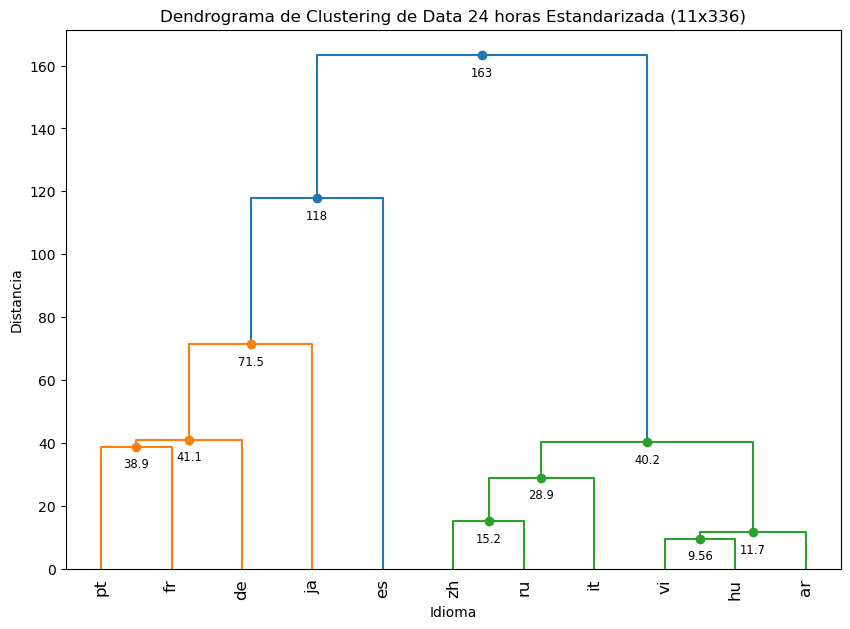

In [34]:
import pandas as pd
import numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Diccionario de números para cada categoría
category_dict = {
    'art': 1,
    'events': 2,
    'foods': 3,
    'games': 4,
    'geography': 5,
    'health': 6,
    'history': 7,
    'mathematics': 8,
    'nature': 9,
    'philosophy': 10,
    'politics': 11,
    'religion': 12,
    'rights': 13,
    'sports': 14
}


data_list = []
for language, categories_data in language_editors.items():
    for category, activity in categories_data.items():
        category_number = category_dict[category]
        for (day_of_week, hour), edits in activity.items():
            # Crear una columna que represente la hora de la semana
            week_hour = day_of_week * 24 + hour
            data_list.append([language, category_number, week_hour, edits])

data = pd.DataFrame(data_list, columns=['language', 'category', 'week_hour', 'edits'])

# Pivotar el DataFrame para que cada hora de la semana sea una columna y cada fila sea una combinación de idioma y categoría
data_pivot = data.pivot_table(index=['language'], columns=['week_hour', 'category'], values='edits', fill_value=0)

# Normalizar los datos utilizando z-score
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_pivot)

# Realizar la clusterización jerárquica
linked = linkage(data_scaled, method='ward')

# Crear etiquetas para cada fila basadas en el idioma
labels = data_pivot.index.tolist()

# Generar el dendrograma y capturar la salida para acceder a las coordenadas de los enlaces
plt.figure(figsize=(10, 7))
dendro = dendrogram(linked,
                    labels=labels,
                    distance_sort='descending',
                    show_leaf_counts=True)

# Añadir anotaciones de distancia
for i, d, c in zip(dendro['icoord'], dendro['dcoord'], dendro['color_list']):
    x = 0.5 * sum(i[1:3])
    y = d[1]
    if y > 0:  # Solo añadir etiquetas por encima de la línea cero para claridad
        plt.plot(x, y, 'o', c=c)
        plt.annotate(f"{y:.3g}", (x, y), xytext=(0, -8),
                     textcoords='offset points', va='top', ha='center', fontsize='small')
plt.title('Dendrograma de Clustering de Data 24 horas Estandarizada (11x336)')
plt.xlabel('Idioma')
plt.ylabel('Distancia')
plt.xticks(rotation=90)
plt.savefig('editores/dendrogram4.png')
plt.show()


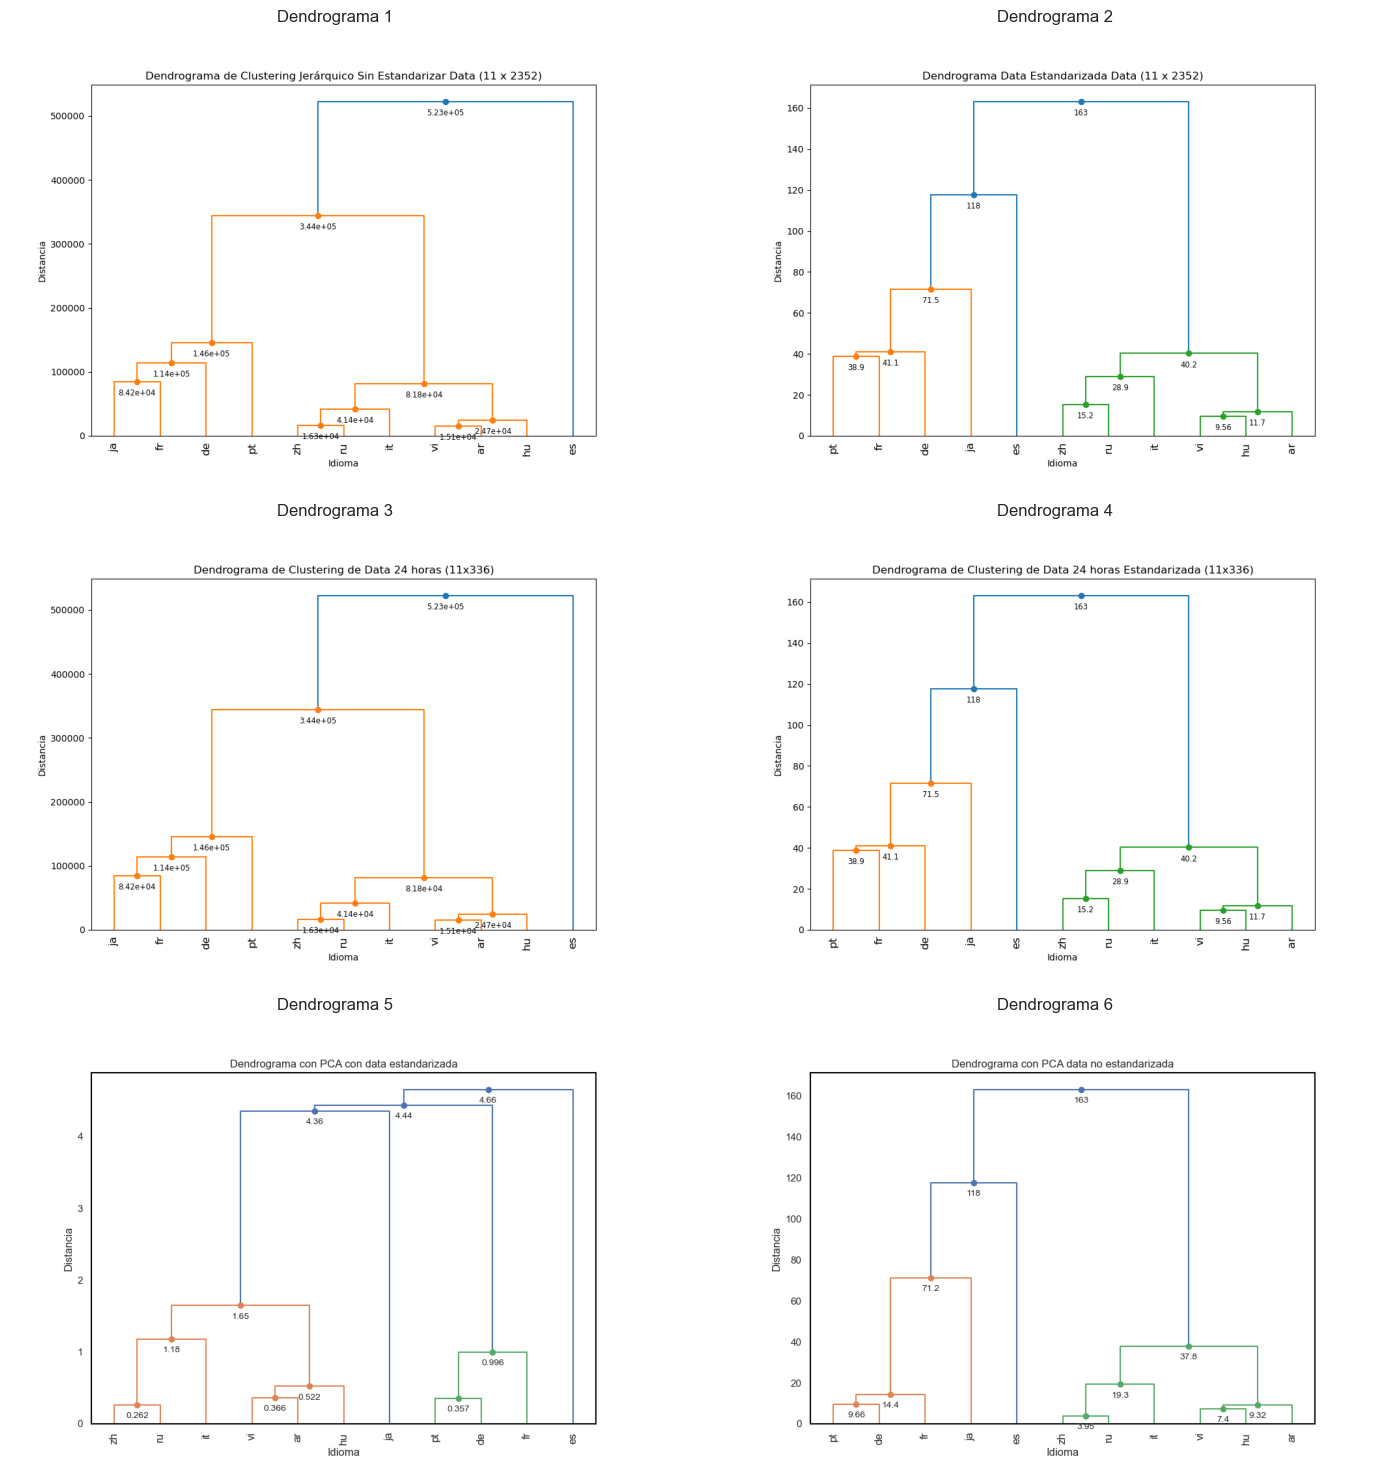

In [21]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Cargar las imágenes de los dendrogramas
img1 = mpimg.imread('editores/dendrogram1.png')
img2 = mpimg.imread('editores/dendrogram2.png')
img3 = mpimg.imread('editores/dendrogram3.png')
img4 = mpimg.imread('editores/dendrogram4.png')
img5 = mpimg.imread('editores/dendrogram5.png')
img6 = mpimg.imread('editores/dendrogram6.png')

# Crear un solo plot con 6 cuadrantes (3x2)
fig, axs = plt.subplots(3, 2, figsize=(15, 15))

# Mostrar las imágenes en cada subplot
axs[0, 0].imshow(img1)
axs[0, 0].axis('off')
axs[0, 0].set_title('Dendrograma 1')

axs[0, 1].imshow(img2)
axs[0, 1].axis('off')
axs[0, 1].set_title('Dendrograma 2')

axs[1, 0].imshow(img3)
axs[1, 0].axis('off')
axs[1, 0].set_title('Dendrograma 3')

axs[1, 1].imshow(img4)
axs[1, 1].axis('off')
axs[1, 1].set_title('Dendrograma 4')

axs[2, 0].imshow(img5)
axs[2, 0].axis('off')
axs[2, 0].set_title('Dendrograma 5')

axs[2, 1].imshow(img6)
axs[2, 1].axis('off')
axs[2, 1].set_title('Dendrograma 6')

plt.tight_layout()
plt.show()

In [46]:
combined_activities

{'art': day_of_week  hour
 0            0       50890
              1       41397
              2       33344
              3       26365
              4       20887
                      ...  
 6            19      69046
              20      68169
              21      67696
              22      66155
              23      60102
 Name: art, Length: 168, dtype: int64,
 'events': day_of_week  hour
 0            0       33461
              1       27012
              2       22033
              3       17574
              4       13883
                      ...  
 6            19      46364
              20      45341
              21      44600
              22      43670
              23      39467
 Name: events, Length: 168, dtype: int64,
 'foods': day_of_week  hour
 0            0       1228
              1       1028
              2        799
              3        578
              4        447
                      ... 
 6            19      1345
              20      1363
    

In [12]:
data_pivot

week_hour    0                                                             \
category      1      2    3     4     5     6      7     8      9      10   
language                                                                    
ar           810    591   77   231   800   559    859   296    884    619   
de         10550   2753    0   614  4637   823   7238   650   3397   1021   
es         14509  12582    0  1486  8839  4909  21719  1768  10052  15874   
fr          4900   4565    0   769  5074  3243   6868  1016   2666   2720   
hu           429    145    0    38   431    79    613    48    334    136   
it          2482   2488    0   789  2040  1266   1879   328   1340   1116   
ja          6044   1201  709  1808  5588  2989   7540   986   6263   2934   
pt          6100   6449    0   708  2989  1925   7764   410   6286   5199   
ru          2324   1491  237   673  1803   647   2585   413   2964    940   
vi           214    237   20   113   311   186    296   113    344    255   
zh          2528    959  185   339  1707   754   1769   705   2559    999   

week_hour  ...    167                                                       \
category   ...     5     6      7     8      9      10     11    12     13   
language   ...                                                               
ar         ...    796   560    858   301    880    624    846   589    357   
de         ...   5948  1121   8932   828   4367   1307   7935  4351   3846   
es         ...  10092  5547  24427  1980  11194  17828  12215  5147  15442   
fr         ...   6285  4275   8662  1401   3277   3445   6679  2712   3613   
hu         ...    655   126    947    82    493    216    501   236    285   
it         ...   2645  1594   2341   392   1717   1369   1817  1659   1589   
ja         ...   6243  3371   8368  1125   6968   3253   5130  2021   2019   
pt         ...   3661  2351   9509   521   7741   6388   5475  2833   1216   
ru         ...   2035   783   2828   456   3272   1015   1679  1206   1125   
vi         ...    355   214    355   145    396    311    381   124     94   
zh         ...   1892   888   1967   825   2784   1145   2054   885    837   

week_hour        
category     14  
language         
ar          330  
de         3710  
es         6072  
fr         2499  
hu          192  
it         1367  
ja         2648  
pt         2928  
ru          924  
vi           71  
zh          645  

[11 rows x 2352 columns]

In [65]:
editors_per_hour

week_hour  category
0          1           50890
           2           33461
           3            1228
           4            7568
           5           34219
                       ...  
167        10          36901
           11          44712
           12          21763
           13          30423
           14          21386
Length: 2352, dtype: int64

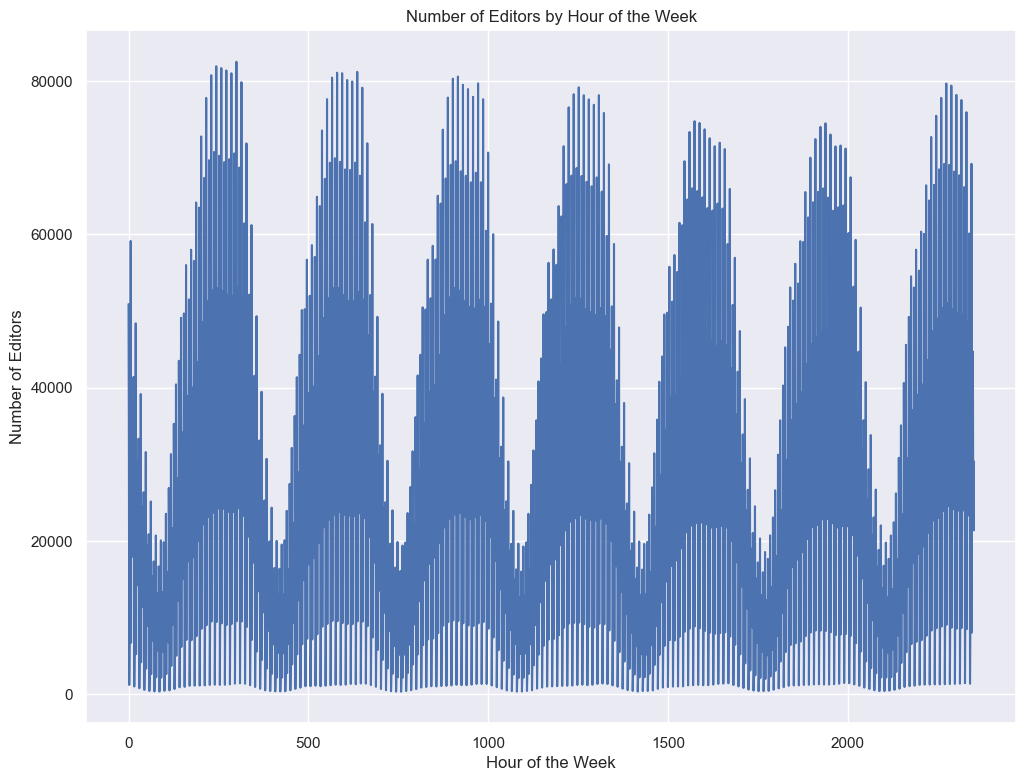

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Asumir que data_pivot ya está definida
# Primero, necesitamos agregar el número de editores por hora de la semana a través de todas las categorías.

# Sumar el número de editores en todas las filas (idiomas) para cada columna (hora de la semana)
editors_per_hour = data_pivot.sum(axis=0)

# Crear el gráfico
plt.figure(figsize=(12, 9))
plt.plot(range(len(editors_per_hour)), editors_per_hour)
plt.xlabel('Hour of the Week')
plt.ylabel('Number of Editors')
plt.title('Number of Editors by Hour of the Week')
plt.show()

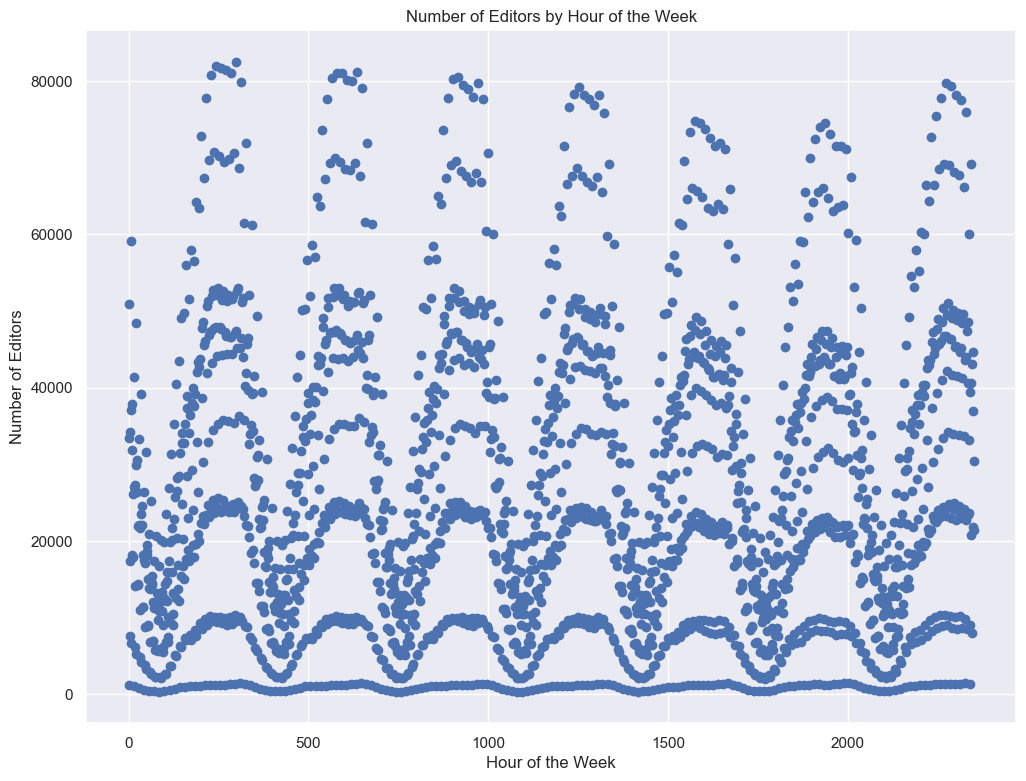

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Crear el gráfico
plt.figure(figsize=(12, 9))
plt.scatter(range(len(editors_per_hour)), editors_per_hour)
plt.xlabel('Hour of the Week')
plt.ylabel('Number of Editors')
plt.title('Number of Editors by Hour of the Week')
plt.show()

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# For standardizing features. We'll use the StandardScaler module.
from sklearn.preprocessing import StandardScaler
# Sk Learn is one of the most widely used libraries for machine learning. We'll use the k means and pca modules.
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [32]:
data_pivot = pd.DataFrame(editors_per_hour)

In [35]:
data_pivot

0
week_hour category       
0         1         50890
          2         33461
          3          1228
          4          7568
          5         34219
...                   ...
167       10        36901
          11        44712
          12        21763
          13        30423
          14        21386

[2352 rows x 1 columns]

## ESTANDARIZACION PARA PCA

In [7]:
scaler = StandardScaler()
segmentation_std = scaler.fit_transform(data_pivot)
#segmentation_std = data_pivot

In [10]:


# PCA
pca = PCA()
pca.fit(segmentation_std)

# The attribute shows how much variance is explained by each of the seven individual components.
print(pca.explained_variance_ratio_)



[6.02915687e-01 1.29815572e-01 9.80380520e-02 6.20987064e-02
 4.77568272e-02 3.99590674e-02 1.10097612e-02 4.22100908e-03
 3.37492019e-03 8.10398075e-04 2.29779953e-31]


[6.02915687e-01 1.29815572e-01 9.80380520e-02 6.20987064e-02
 4.77568272e-02 3.99590674e-02 1.10097612e-02 4.22100908e-03
 3.37492019e-03 8.10398075e-04 2.29779953e-31]


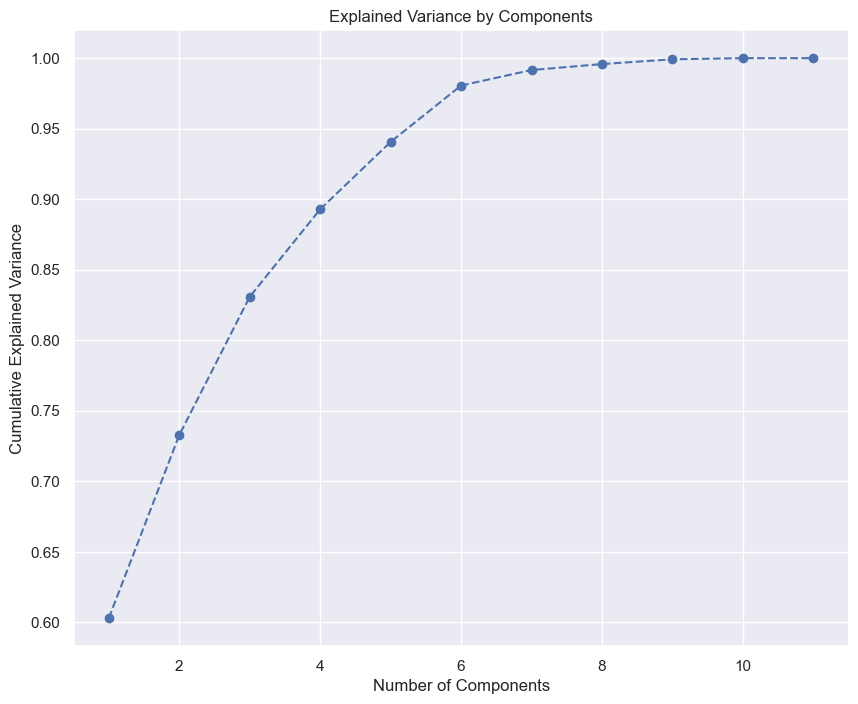

In [11]:
 #The attribute shows how much variance is explained by each of the individual components.
explained_variance_ratio = pca.explained_variance_ratio_
print(explained_variance_ratio)

# Graficar la varianza explicada acumulada
plt.figure(figsize=(10, 8))
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio.cumsum(), marker='o', linestyle='--')
plt.title('Explained Variance by Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

In [12]:
# Elegimos tres componentes. 3 o 4 parece la elección correcta según el gráfico anterior.
pca = PCA(n_components=3)

# Ajustamos el modelo con el número seleccionado de componentes. En nuestro caso, tres.
pca.fit(segmentation_std)



PCA(n_components=3)

In [13]:
scores_pca = pca.transform(segmentation_std)

In [15]:

# Varianza explicada por cada uno de los 3 componentes principales
explained_variance_ratio = pca.explained_variance_ratio_

# Calcular la varianza acumulada
cumulative_variance = np.cumsum(explained_variance_ratio)

# Imprimir resultados
print(f"Data Estandarizada EDICIONES:")
print(f"Varianza explicada por cada componente: {explained_variance_ratio}")
print(f"Varianza acumulada: {cumulative_variance}")
print(f"Porcentaje de información retenida: {cumulative_variance[-1] * 100:.2f}%")
print(f"Porcentaje de información perdida: {(1 - cumulative_variance[-1]) * 100:.2f}%")

Data Estandarizada EDICIONES:
Varianza explicada por cada componente: [0.60291569 0.12981557 0.09803805]
Varianza acumulada: [0.60291569 0.73273126 0.83076931]
Porcentaje de información retenida: 83.08%
Porcentaje de información perdida: 16.92%


In [16]:
# K-means clustering con PCA
# Ajustamos K means usando los datos transformados del PCA.
wcss = []
for i in range(1, 12):
    kmeans_pca = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans_pca.fit(scores_pca)
    wcss.append(kmeans_pca.inertia_)

/Users/andrevill/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/andrevill/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/andrevill/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/andrevill/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` wi

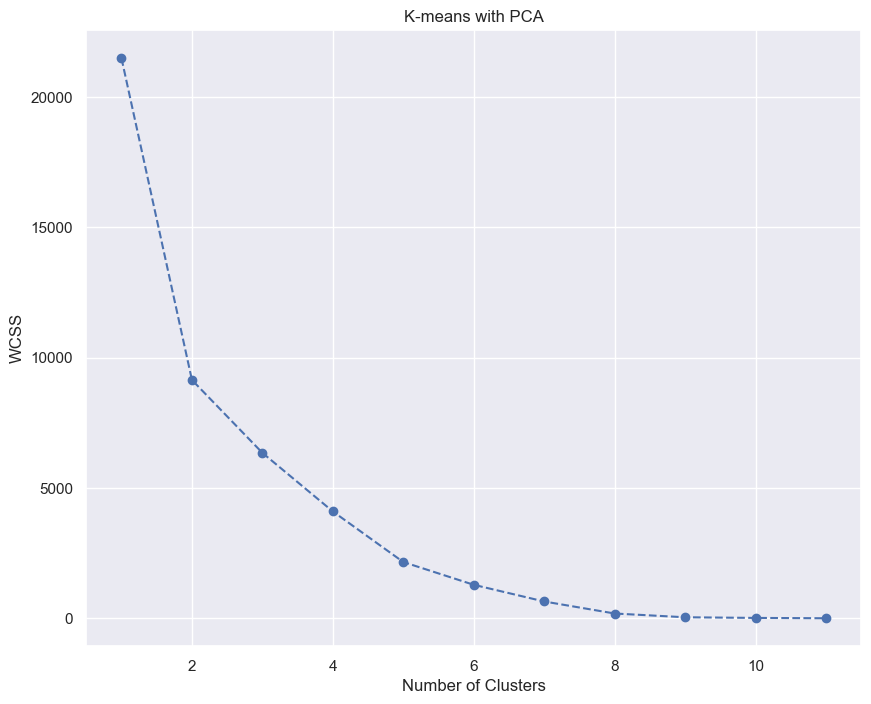

In [33]:
# Graficar el codo para determinar el número óptimo de clusters
plt.figure(figsize=(10, 8))
plt.plot(range(1, 12), wcss, marker='o', linestyle='--')
plt.title('K-means with PCA')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [34]:
# Hemos elegido cuatro clusters, por lo que ejecutamos K-means con el número de clusters igual a cuatro.
# Mismo inicializador y estado aleatorio que antes.
kmeans_pca = KMeans(n_clusters=4, init='k-means++', random_state=42)

# Ajustamos nuestros datos con el modelo k-means pca
kmeans_pca.fit(scores_pca)

/Users/andrevill/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=4, random_state=42)

In [17]:
# Creamos un nuevo DataFrame con las características originales y agregamos los puntajes PCA y los clusters asignados.
df_segm_pca_kmeans = pd.concat([data_pivot.reset_index(drop=True), pd.DataFrame(scores_pca)], axis=1)
df_segm_pca_kmeans.columns.values[-3:] = ['Component 1', 'Component 2', 'Component 3']

# La última columna que agregamos contiene las etiquetas de clustering de k-means con PCA.
df_segm_pca_kmeans['Segment K-means PCA'] = kmeans_pca.labels_

df_segm_pca_kmeans

,"(0, 1)","(0, 2)","(0, 3)","(0, 4)","(0, 5)","(0, 6)","(0, 7)","(0, 8)","(0, 9)","(0, 10)",...,"(167, 9)","(167, 10)","(167, 11)","(167, 12)","(167, 13)","(167, 14)",Component 1,Component 2,Component 3,Segment K-means PCA
0,7077,4235,279,1029,6757,3769,7663,1508,8048,4807,...,7712,4821,7139,4290,1861,1799,-34.043702,-2.308676,-7.100636,8
1,62614,8196,0,1534,24528,1726,45169,1609,13344,2814,...,18845,3655,45905,19674,13667,20825,21.027715,29.733474,6.894263,7
2,41399,38672,0,3619,26207,10938,70021,3624,25609,45795,...,28871,53131,37575,12888,47443,20759,65.275647,-25.465550,-28.739408,4
3,37208,36785,0,3286,45219,22342,70078,3887,16107,13763,...,22000,18508,64306,15994,23829,21352,64.945893,18.863226,13.636625,1
4,2134,704,0,85,2325,277,4074,116,1732,390,...,2769,692,2795,924,1029,1253,-41.057195,10.877598,-12.353554,0
5,21071,21132,0,4446,16524,9429,14857,1077,8188,5264,...,10506,6677,12882,10646,9977,12123,-5.200090,15.006325,2.697203,5
6,29766,3066,1408,5438,28549,11667,47261,2456,30447,9797,...,34653,10810,23806,6324,5291,10813,-1.457946,-29.697685,31.792892,6
7,22304,25085,0,1696,21492,5329,32728,1037,25587,18194,...,31027,22018,25332,9071,3066,11221,24.219958,-1.879483,-5.549137,2
8,14669,7377,706,2551,12359,2184,19634,1250,22889,3419,...,25381,3619,9927,6595,4451,4183,-24.103812,-11.675187,7.581846,3
9,1199,1681,71,554,2570,983,2268,397,2601,1545,...,3434,2304,3765,591,368,430,-45.138291,5.113716,-12.441862,9


In [36]:
# Lista de idiomas (basada en la imagen proporcionada)
languages = ['ar', 'de', 'es', 'fr', 'hu', 'it', 'ja', 'pt', 'ru', 'vi', 'zh']

# Crear un DataFrame de idiomas
languages_df = pd.DataFrame(languages, columns=['language'])

# Asegurar que el índice de languages_df coincida con df_segm_pca_kmeans
languages_df.index = df_segm_pca_kmeans.index

In [37]:
# Combinar los DataFrames
df_combined = pd.concat([languages_df, df_segm_pca_kmeans['Segment K-means PCA']], axis=1)

# Mostrar el nuevo DataFrame
df_combined

,language,Segment K-means PCA
0,ar,2
1,de,1
2,es,3
3,fr,1
4,hu,2
5,it,0
6,ja,0
7,pt,1
8,ru,0
9,vi,2


In [38]:
df_segm_pca_kmeans['Segment'] = df_segm_pca_kmeans['Segment K-means PCA'].map({
    0: 'first',
    1: 'second',
    2: 'third',
    3: 'fourth'
})

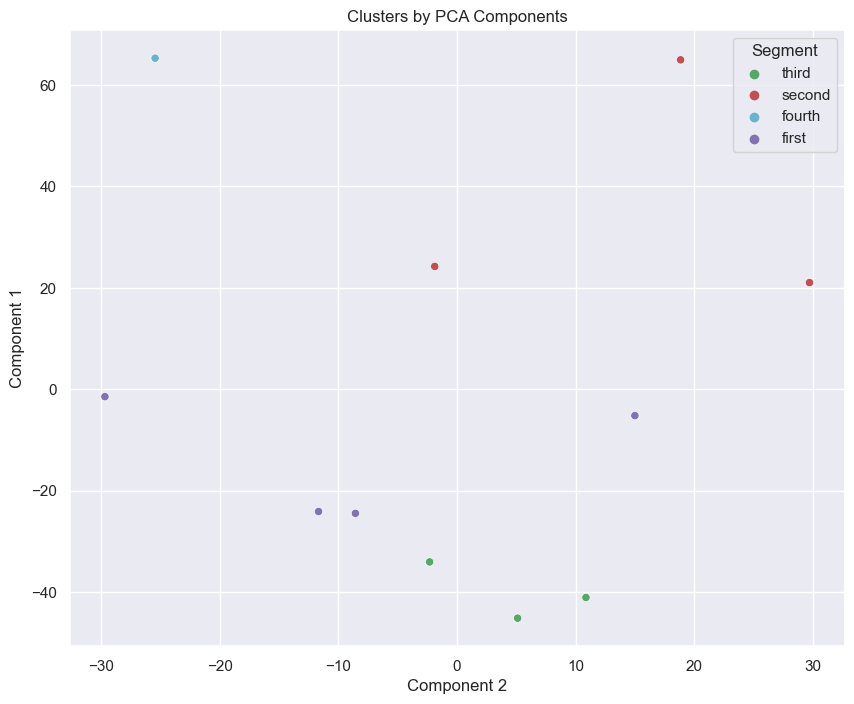

In [39]:
# Graficar datos por componentes PCA. El eje Y es el primer componente, el eje X es el segundo.
x_axis = df_segm_pca_kmeans['Component 2']
y_axis = df_segm_pca_kmeans['Component 1']
plt.figure(figsize=(10, 8))
sns.scatterplot(x=x_axis, y=y_axis, hue=df_segm_pca_kmeans['Segment'], palette=['g', 'r', 'c', 'm'])
plt.title('Clusters by PCA Components')
plt.show()

/Users/andrevill/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


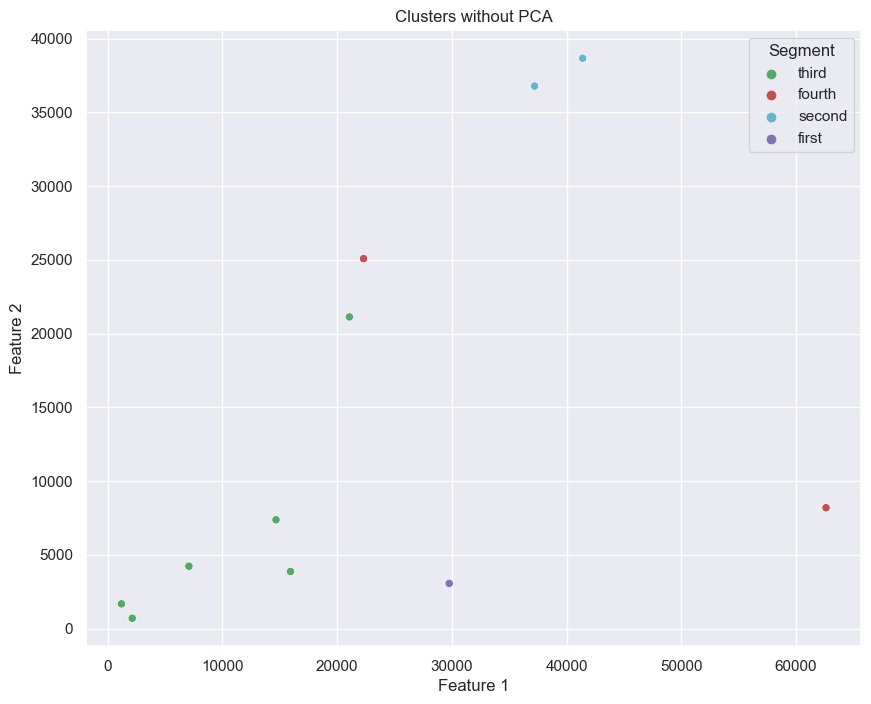

In [40]:
# K-means clustering sin PCA
kmeans_no_pca = KMeans(n_clusters=4, init='k-means++', random_state=42)
kmeans_no_pca.fit(segmentation_std)

# Agregar las etiquetas de clustering al DataFrame original
data_pivot['Segment K-means'] = kmeans_no_pca.labels_

# Asignar etiquetas de texto a los clusters
data_pivot['Segment'] = data_pivot['Segment K-means'].map({
    0: 'first',
    1: 'second',
    2: 'third',
    3: 'fourth'
})

# Graficar los clusters sin PCA
plt.figure(figsize=(10, 8))
sns.scatterplot(x=data_pivot.iloc[:, 0], y=data_pivot.iloc[:, 1], hue=data_pivot['Segment'], palette=['g', 'r', 'c', 'm'])
plt.title('Clusters without PCA')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

In [64]:
cluster_sums = data_pivot.groupby('Segment').sum()

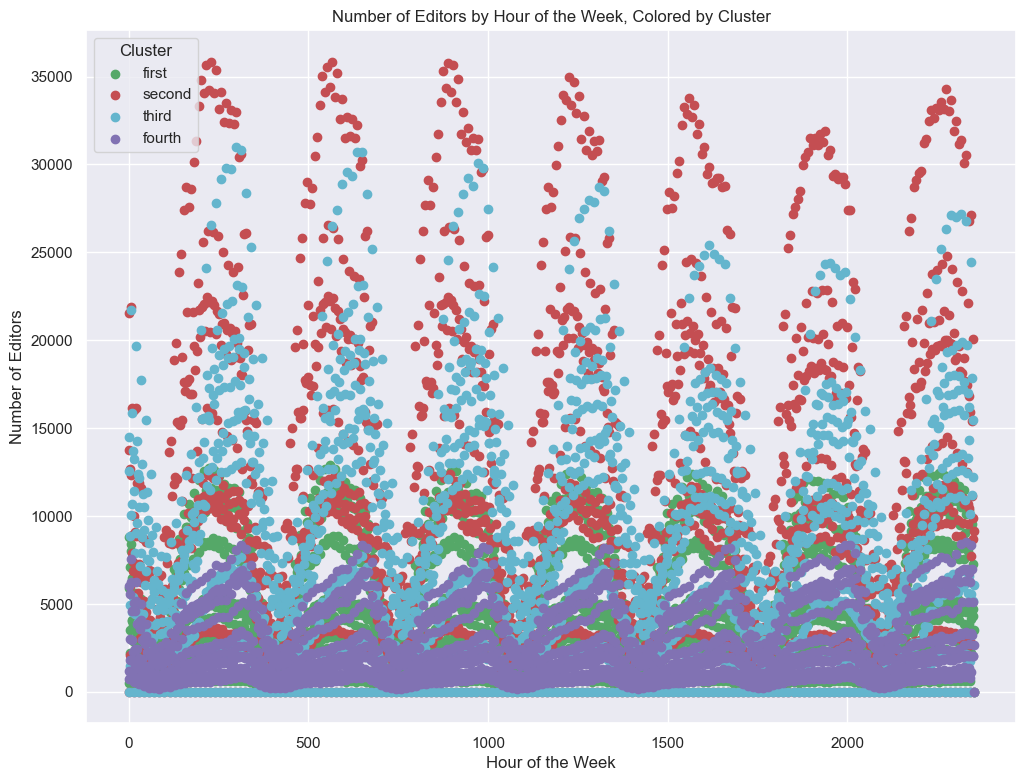

In [65]:
plt.figure(figsize=(12, 9))
colors = {'first': 'g', 'second': 'r', 'third': 'c', 'fourth': 'm'}

for segment, color in colors.items():
    plt.scatter(range(cluster_sums.shape[1]), cluster_sums.loc[segment], label=segment, color=color)

plt.xlabel('Hour of the Week')
plt.ylabel('Number of Editors')
plt.title('Number of Editors by Hour of the Week, Colored by Cluster')
plt.legend(title='Cluster')
plt.show()

In [18]:
import pandas as pd

# Lista de idiomas (basada en la imagen proporcionada)
languages = ['ar', 'de', 'es', 'fr', 'hu', 'it', 'ja', 'pt', 'ru', 'vi', 'zh']

# Crear un DataFrame de idiomas
languages_df = pd.DataFrame(languages, columns=['language'])

# Asegurar que el índice de languages_df coincida con df_segm_pca_kmeans
languages_df.index = df_segm_pca_kmeans.index

# Combinar los DataFrames
df_combined = pd.concat([languages_df, df_segm_pca_kmeans[['Component 1', 'Component 2', 'Component 3']]], axis=1)

# Establecer los idiomas como índice
df_combined.set_index('language', inplace=True)

# Mostrar el nuevo DataFrame
print(df_combined)

          Component 1  Component 2  Component 3
language                                       
ar         -34.043702    -2.308676    -7.100636
de          21.027715    29.733474     6.894263
es          65.275647   -25.465550   -28.739408
fr          64.945893    18.863226    13.636625
hu         -41.057195    10.877598   -12.353554
it          -5.200090    15.006325     2.697203
ja          -1.457946   -29.697685    31.792892
pt          24.219958    -1.879483    -5.549137
ru         -24.103812   -11.675187     7.581846
vi         -45.138291     5.113716   -12.441862
zh         -24.468179    -8.567759     3.581766


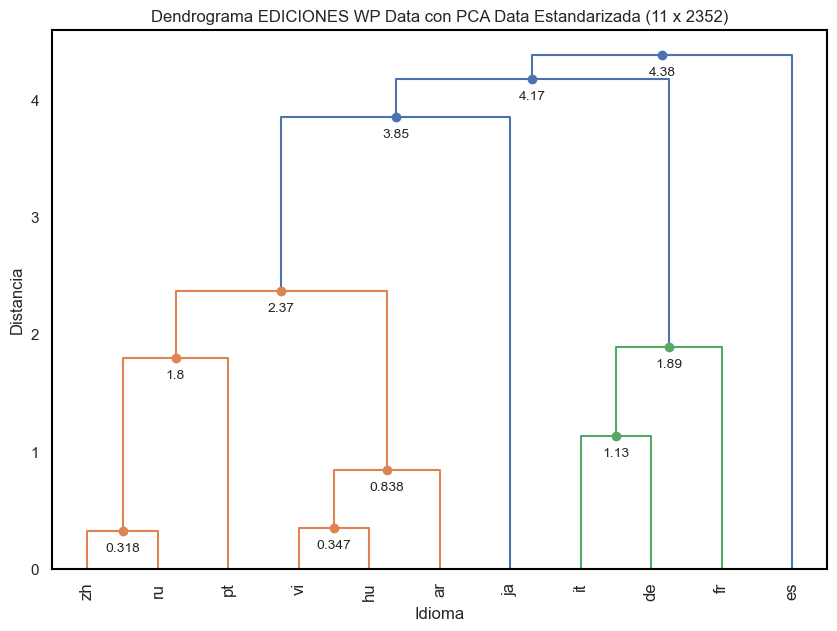

In [19]:
import pandas as pd
import numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


# Normalizar los datos utilizando z-score
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df_combined)

# Realizar la clusterización jerárquica
linked = linkage(data_scaled, method='ward')

# Crear etiquetas para cada fila basadas en el idioma
labels = data_pivot.index.tolist()

# Generar el dendrograma y capturar la salida para acceder a las coordenadas de los enlaces
plt.figure(figsize=(10, 7))
dendro = dendrogram(linked,
                    labels=labels,
                    distance_sort='descending',
                    show_leaf_counts=True)

# Añadir anotaciones de distancia
for i, d, c in zip(dendro['icoord'], dendro['dcoord'], dendro['color_list']):
    x = 0.5 * sum(i[1:3])
    y = d[1]
    if y > 0:  # Solo añadir etiquetas por encima de la línea cero para claridad
        plt.plot(x, y, 'o', c=c)
        plt.annotate(f"{y:.3g}", (x, y), xytext=(0, -8),
                     textcoords='offset points', va='top', ha='center', fontsize='small')
plt.title('Dendrograma EDICIONES WP Data con PCA Data Estandarizada (11 x 2352)')
plt.grid(False)
plt.gca().set_facecolor('white')
plt.xlabel('Idioma')
plt.ylabel('Distancia')
plt.xticks(rotation=90)
ax = plt.gca()
ax.set_facecolor('white')
for spine in ax.spines.values():
    spine.set_edgecolor('black')
    spine.set_linewidth(1.5)

# Mostrar el gráfico
plt.savefig('ediciones/dendrogram4.png')
plt.show()


## PCA SIN ESTANDARIZAR

In [20]:
data_pivot=df = data_pivot.drop(columns=['Segment K-means', 'Segment'])

KeyError: 'Segment K-means'

In [21]:
segmentation_std = data_pivot

In [22]:

# PCA
pca = PCA()
pca.fit(segmentation_std)

# The attribute shows how much variance is explained by each of the seven individual components.
print(pca.explained_variance_ratio_)


[7.57335971e-01 1.13848227e-01 5.93877188e-02 3.00894857e-02
 2.60128672e-02 8.06660714e-03 2.47448549e-03 1.94220994e-03
 6.30244076e-04 2.12183663e-04 1.92030224e-32]


[7.57335971e-01 1.13848227e-01 5.93877188e-02 3.00894857e-02
 2.60128672e-02 8.06660714e-03 2.47448549e-03 1.94220994e-03
 6.30244076e-04 2.12183663e-04 1.92030224e-32]


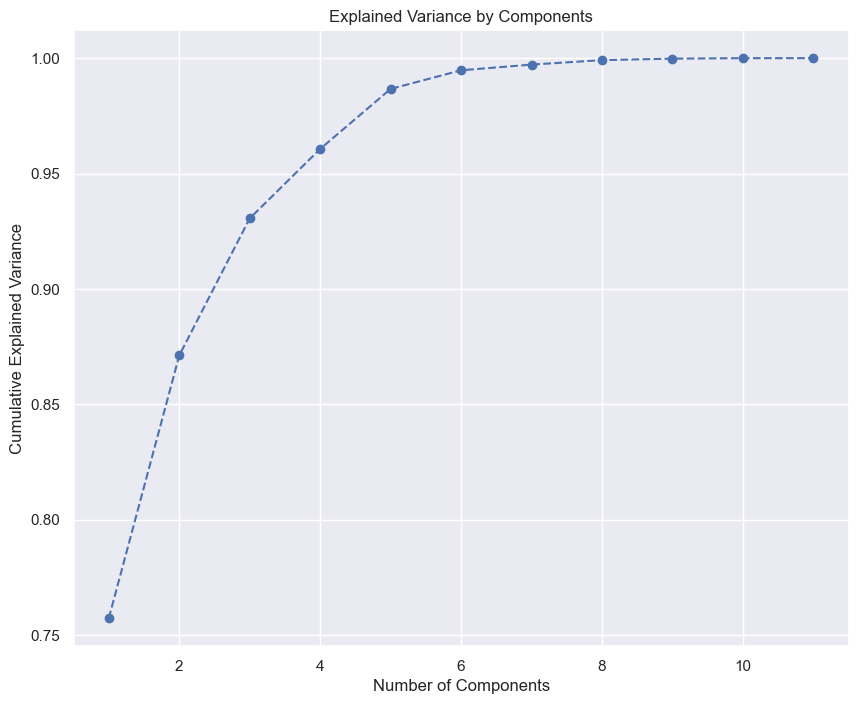

In [23]:
 #The attribute shows how much variance is explained by each of the individual components.
explained_variance_ratio = pca.explained_variance_ratio_
print(explained_variance_ratio)

# Graficar la varianza explicada acumulada
plt.figure(figsize=(10, 8))
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio.cumsum(), marker='o', linestyle='--')
plt.title('Explained Variance by Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

In [24]:
# Elegimos tres componentes. 3 o 4 parece la elección correcta según el gráfico anterior.
pca = PCA(n_components=3)

# Ajustamos el modelo con el número seleccionado de componentes. En nuestro caso, tres.
pca.fit(segmentation_std)

PCA(n_components=3)

In [25]:

# Varianza explicada por cada uno de los 3 componentes principales
explained_variance_ratio = pca.explained_variance_ratio_

# Calcular la varianza acumulada
cumulative_variance = np.cumsum(explained_variance_ratio)

# Imprimir resultados
print(f"Data NO Estandarizada EDICIONES:")
print(f"Varianza explicada por cada componente: {explained_variance_ratio}")
print(f"Varianza acumulada: {cumulative_variance}")
print(f"Porcentaje de información retenida: {cumulative_variance[-1] * 100:.2f}%")
print(f"Porcentaje de información perdida: {(1 - cumulative_variance[-1]) * 100:.2f}%")

Data NO Estandarizada EDICIONES:
Varianza explicada por cada componente: [0.75733597 0.11384823 0.05938772]
Varianza acumulada: [0.75733597 0.8711842  0.93057192]
Porcentaje de información retenida: 93.06%
Porcentaje de información perdida: 6.94%


In [26]:
# Creamos un nuevo DataFrame con las características originales y agregamos los puntajes PCA y los clusters asignados.
df_segm_pca_kmeans = pd.concat([data_pivot.reset_index(drop=True), pd.DataFrame(scores_pca)], axis=1)
df_segm_pca_kmeans.columns.values[-3:] = ['Component 1', 'Component 2', 'Component 3']

# La última columna que agregamos contiene las etiquetas de clustering de k-means con PCA.
df_segm_pca_kmeans['Segment K-means PCA'] = kmeans_pca.labels_

df_segm_pca_kmeans

,"(0, 1)","(0, 2)","(0, 3)","(0, 4)","(0, 5)","(0, 6)","(0, 7)","(0, 8)","(0, 9)","(0, 10)",...,"(167, 9)","(167, 10)","(167, 11)","(167, 12)","(167, 13)","(167, 14)",Component 1,Component 2,Component 3,Segment K-means PCA
0,7077,4235,279,1029,6757,3769,7663,1508,8048,4807,...,7712,4821,7139,4290,1861,1799,-34.043702,-2.308676,-7.100636,8
1,62614,8196,0,1534,24528,1726,45169,1609,13344,2814,...,18845,3655,45905,19674,13667,20825,21.027715,29.733474,6.894263,7
2,41399,38672,0,3619,26207,10938,70021,3624,25609,45795,...,28871,53131,37575,12888,47443,20759,65.275647,-25.465550,-28.739408,4
3,37208,36785,0,3286,45219,22342,70078,3887,16107,13763,...,22000,18508,64306,15994,23829,21352,64.945893,18.863226,13.636625,1
4,2134,704,0,85,2325,277,4074,116,1732,390,...,2769,692,2795,924,1029,1253,-41.057195,10.877598,-12.353554,0
5,21071,21132,0,4446,16524,9429,14857,1077,8188,5264,...,10506,6677,12882,10646,9977,12123,-5.200090,15.006325,2.697203,5
6,29766,3066,1408,5438,28549,11667,47261,2456,30447,9797,...,34653,10810,23806,6324,5291,10813,-1.457946,-29.697685,31.792892,6
7,22304,25085,0,1696,21492,5329,32728,1037,25587,18194,...,31027,22018,25332,9071,3066,11221,24.219958,-1.879483,-5.549137,2
8,14669,7377,706,2551,12359,2184,19634,1250,22889,3419,...,25381,3619,9927,6595,4451,4183,-24.103812,-11.675187,7.581846,3
9,1199,1681,71,554,2570,983,2268,397,2601,1545,...,3434,2304,3765,591,368,430,-45.138291,5.113716,-12.441862,9


In [27]:
import pandas as pd

# Lista de idiomas (basada en la imagen proporcionada)
languages = ['ar', 'de', 'es', 'fr', 'hu', 'it', 'ja', 'pt', 'ru', 'vi', 'zh']

# Crear un DataFrame de idiomas
languages_df = pd.DataFrame(languages, columns=['language'])

# Asegurar que el índice de languages_df coincida con df_segm_pca_kmeans
languages_df.index = df_segm_pca_kmeans.index

# Combinar los DataFrames
df_combined = pd.concat([languages_df, df_segm_pca_kmeans[['Component 1', 'Component 2', 'Component 3']]], axis=1)

# Establecer los idiomas como índice
df_combined.set_index('language', inplace=True)

# Mostrar el nuevo DataFrame
print(df_combined)

          Component 1  Component 2  Component 3
language                                       
ar         -34.043702    -2.308676    -7.100636
de          21.027715    29.733474     6.894263
es          65.275647   -25.465550   -28.739408
fr          64.945893    18.863226    13.636625
hu         -41.057195    10.877598   -12.353554
it          -5.200090    15.006325     2.697203
ja          -1.457946   -29.697685    31.792892
pt          24.219958    -1.879483    -5.549137
ru         -24.103812   -11.675187     7.581846
vi         -45.138291     5.113716   -12.441862
zh         -24.468179    -8.567759     3.581766


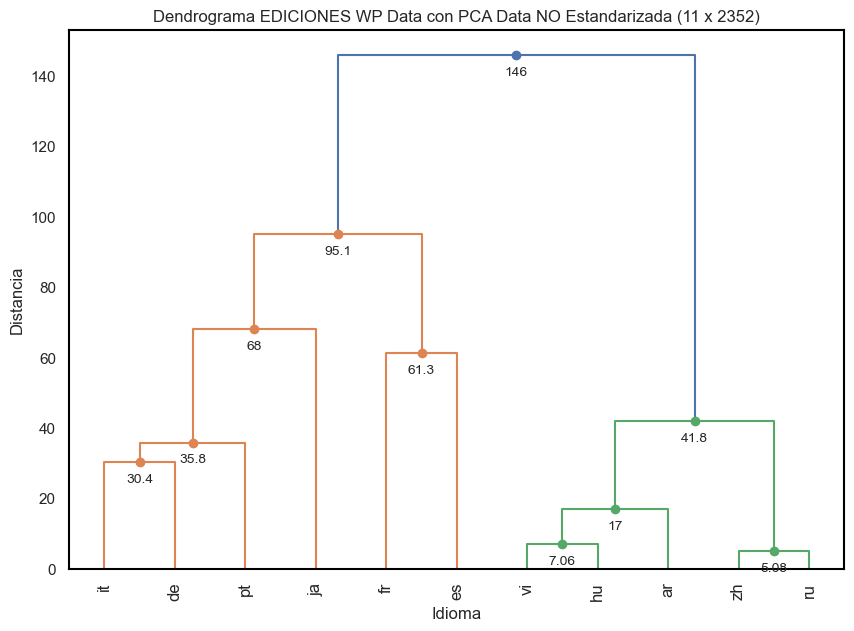

In [28]:
import pandas as pd
import numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


# Normalizar los datos utilizando z-score
data_scaled = df_combined

# Realizar la clusterización jerárquica
linked = linkage(data_scaled, method='ward')

# Crear etiquetas para cada fila basadas en el idioma
labels = data_pivot.index.tolist()

# Generar el dendrograma y capturar la salida para acceder a las coordenadas de los enlaces
plt.figure(figsize=(10, 7))
dendro = dendrogram(linked,
                    labels=labels,
                    distance_sort='descending',
                    show_leaf_counts=True)

# Añadir anotaciones de distancia
for i, d, c in zip(dendro['icoord'], dendro['dcoord'], dendro['color_list']):
    x = 0.5 * sum(i[1:3])
    y = d[1]
    if y > 0:  # Solo añadir etiquetas por encima de la línea cero para claridad
        plt.plot(x, y, 'o', c=c)
        plt.annotate(f"{y:.3g}", (x, y), xytext=(0, -8),
                     textcoords='offset points', va='top', ha='center', fontsize='small')
plt.title('Dendrograma EDICIONES WP Data con PCA Data NO Estandarizada (11 x 2352)')
plt.grid(False)
plt.gca().set_facecolor('white')
plt.xlabel('Idioma')
plt.ylabel('Distancia')
plt.xticks(rotation=90)
ax = plt.gca()
ax.set_facecolor('white')
for spine in ax.spines.values():
    spine.set_edgecolor('black')
    spine.set_linewidth(1.5)

# Mostrar el gráfico
plt.savefig('ediciones/dendrogram3.png')
plt.show()


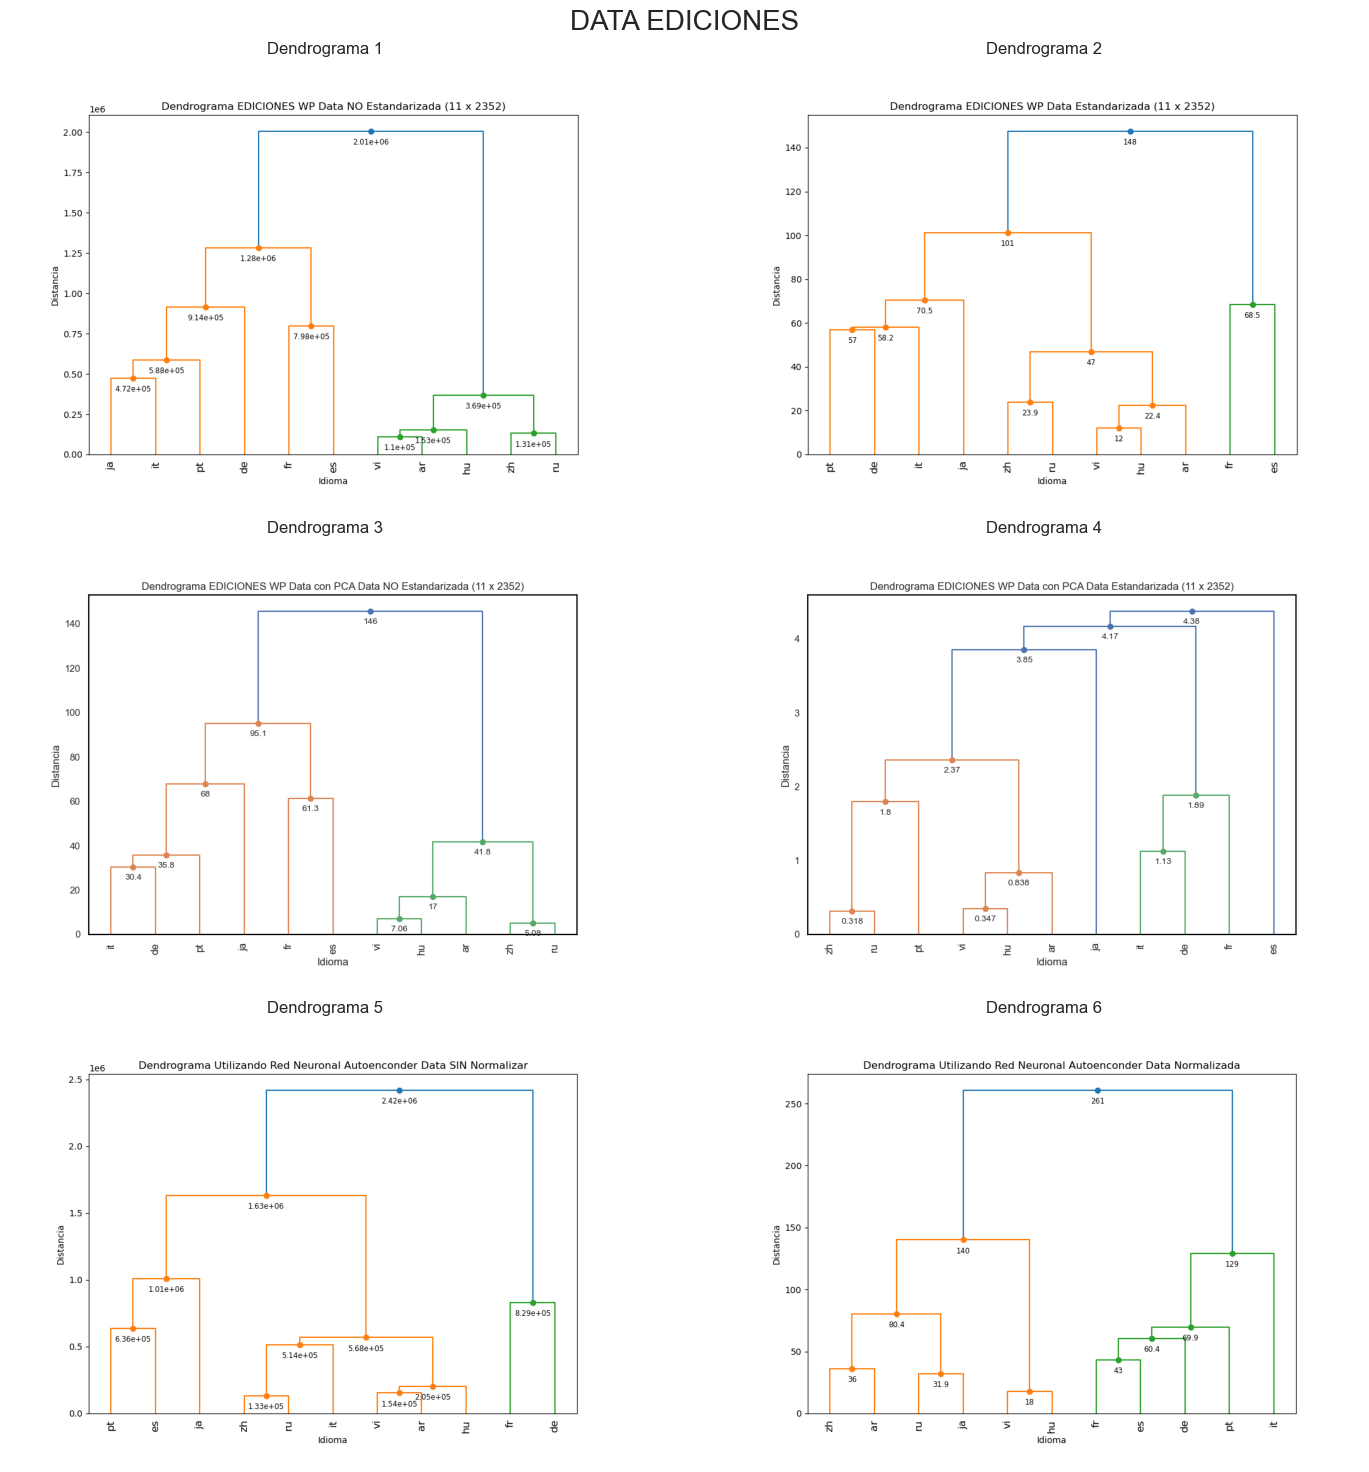

In [30]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Cargar las imágenes de los dendrogramas
img1 = mpimg.imread('ediciones/dendrogram1.png')
img2 = mpimg.imread('ediciones/dendrogram2.png')
img3 = mpimg.imread('ediciones/dendrogram3.png')
img4 = mpimg.imread('ediciones/dendrogram4.png')
img5 = mpimg.imread('ediciones/dendrogram7.png')
img6 = mpimg.imread('ediciones/dendrogram8.png')

# Crear un solo plot con 6 cuadrantes (3x2)
fig, axs = plt.subplots(3, 2, figsize=(15, 15))
fig.suptitle('DATA EDICIONES', fontsize=20)

# Mostrar las imágenes en cada subplot
axs[0, 0].imshow(img1)
axs[0, 0].axis('off')
axs[0, 0].set_title('Dendrograma 1')

axs[0, 1].imshow(img2)
axs[0, 1].axis('off')
axs[0, 1].set_title('Dendrograma 2')

axs[1, 0].imshow(img3)
axs[1, 0].axis('off')
axs[1, 0].set_title('Dendrograma 3')

axs[1, 1].imshow(img4)
axs[1, 1].axis('off')
axs[1, 1].set_title('Dendrograma 4')

axs[2, 0].imshow(img6)
axs[2, 0].axis('off')
axs[2, 0].set_title('Dendrograma 5')

axs[2, 1].imshow(img5)
axs[2, 1].axis('off')
axs[2, 1].set_title('Dendrograma 6')

plt.tight_layout()
plt.show()

In [69]:
import numpy as np
from sklearn.decomposition import PCA

# Fijar la semilla para reproducibilidad
np.random.seed(0)

# Generar datos aleatorios
data = np.random.rand(11, 2352)

# Crear el modelo PCA especificando el número de componentes
pca = PCA(n_components=3)

# Ajustar PCA a los datos
pca.fit(data)

# Varianza explicada por cada uno de los 3 componentes principales
explained_variance_ratio = pca.explained_variance_ratio_

# Calcular la varianza acumulada
cumulative_variance = np.cumsum(explained_variance_ratio)

# Imprimir resultados
print(f"Varianza explicada por cada componente: {explained_variance_ratio}")
print(f"Varianza acumulada: {cumulative_variance}")
print(f"Porcentaje de información retenida: {cumulative_variance[-1] * 100:.2f}%")
print(f"Porcentaje de información perdida: {(1 - cumulative_variance[-1]) * 100:.2f}%")

Varianza explicada por cada componente: [0.11068654 0.10922586 0.10664739]
Varianza acumulada: [0.11068654 0.2199124  0.32655979]
Porcentaje de información retenida: 32.66%
Porcentaje de información perdida: 67.34%
